In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv(r"C:\Python3.7\Salary_Data.csv")

In [3]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


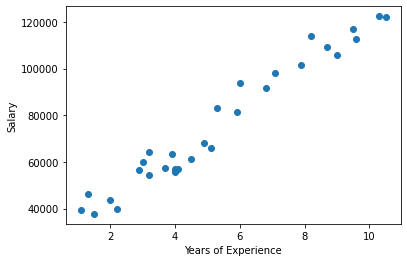

In [4]:
plt.scatter(dataset["YearsExperience"],dataset["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [6]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [9]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [10]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

# Linear Regression


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
LR=LinearRegression() 
LR.fit(x_train,y_train)

LinearRegression()

In [13]:
pred_LR=LR.predict(x_test)

In [14]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [15]:
pred_LR

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [16]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [17]:
diff_LR=y_test-pred_LR
res_df=pd.concat([pd.Series(pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['prediction','Original data','difference']

In [18]:
res_df

,prediction,Original data,difference
0,40835.105909,37731.0,-3104.105909
1,123079.399408,122391.0,-688.399408
2,65134.556261,57081.0,-8053.556261
3,63265.367772,63218.0,-47.367772
4,115602.645454,116969.0,1366.354546
5,108125.891499,109431.0,1305.108501
6,116537.239698,112635.0,-3902.239698
7,64199.962017,55794.0,-8405.962017
8,76349.687193,83088.0,6738.312807
9,100649.137545,101302.0,652.862455


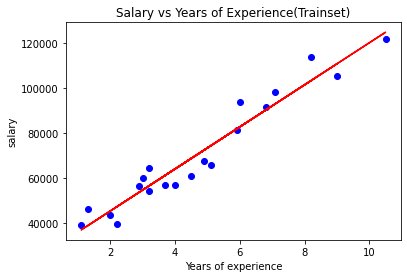

In [19]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title("Salary vs Years of Experience(Trainset)")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.show()

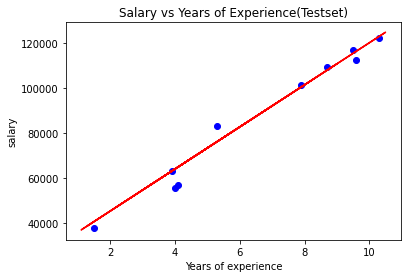

In [20]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title("Salary vs Years of Experience(Testset)")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.show()

# Metrics


In [21]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_LR))
rmse

4585.4157204675885

In [22]:
LR.predict([[10]])

array([120275.61667525])

# Decision Tree 

In [23]:
from sklearn.tree import DecisionTreeRegressor


In [24]:
DT=DecisionTreeRegressor()

In [25]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
pred_DT=DT.predict(x_test)

In [27]:
pred_DT

array([ 46205., 121872.,  56957.,  56957., 105582., 105582., 105582.,
        56957.,  66029., 113812.])

In [28]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [29]:
diff_DT=y_test-pred_DT
res_dT=pd.concat([pd.Series(pred_DT),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dT.columns=['prediction','Original data','difference']

In [30]:
res_dT

,prediction,Original data,difference
0,46205.0,37731.0,-8474.0
1,121872.0,122391.0,519.0
2,56957.0,57081.0,124.0
3,56957.0,63218.0,6261.0
4,105582.0,116969.0,11387.0
5,105582.0,109431.0,3849.0
6,105582.0,112635.0,7053.0
7,56957.0,55794.0,-1163.0
8,66029.0,83088.0,17059.0
9,113812.0,101302.0,-12510.0


In [31]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

   # Metrics

In [32]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_DT))
R2=metrics.r2_score(y_test,pred_DT)

In [33]:
rmse

8685.499772609519

In [34]:
R2

0.910000795725282

In [35]:
DT.predict([[4]])

array([56957.])

In [36]:
from sklearn import tree

In [37]:
text_representation = tree.export_text(DT)

In [38]:
print(text_representation)

|--- feature_0 <= 5.50
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 4.25
|   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |--- value: [59445.00]
|   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |   |--- feature_0 <= 3.85
|   |   |   |   |   |   |--- value: [

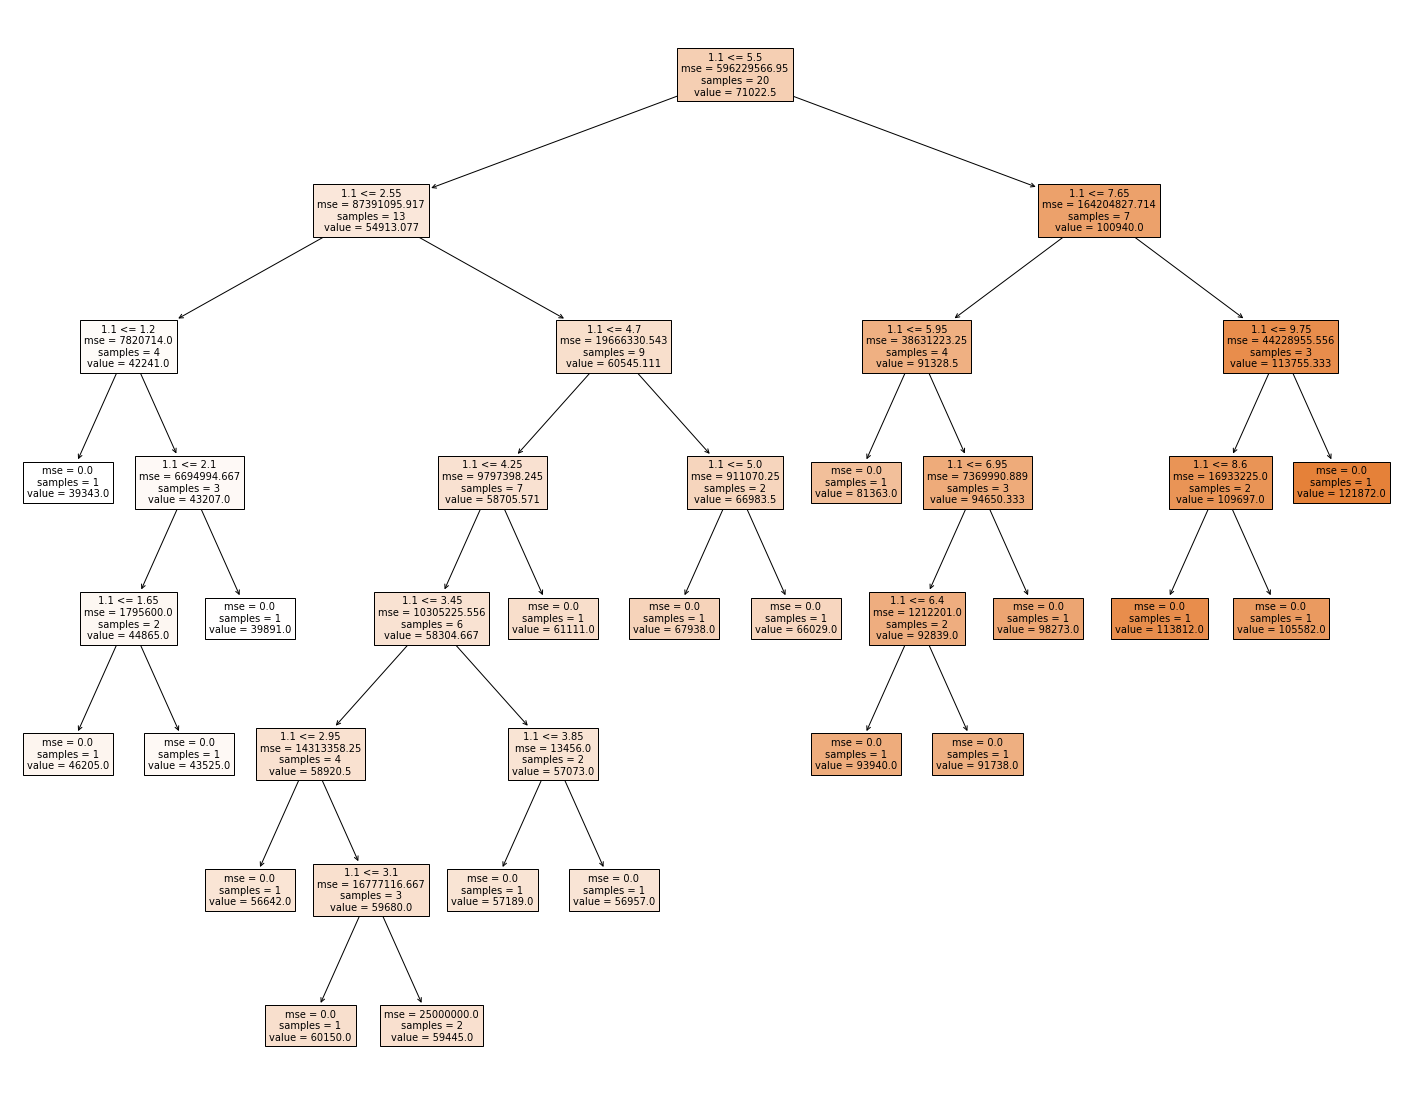

In [39]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset["YearsExperience"],filled=True)

In [40]:
fig.savefig(r'C:\Python3.7\DT.png')

# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=20,random_state=0)

In [61]:
RF=RandomForestRegressor()

In [62]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
pred_RF=RF.predict(x_test)

In [64]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [65]:
pred_RF

array([ 44500.05, 117022.07,  57829.72,  57609.86, 111483.47, 106878.39,
       111483.47,  57609.86,  67609.33, 108683.64])

In [66]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [67]:
diff_RF=y_test-pred_RF
res_RF=pd.concat([pd.Series(pred_RF),pd.Series(y_test),pd.Series(diff_RF)],axis=1)
res_RF.columns=['prediction','Original data','difference']

In [68]:
res_RF

,prediction,Original data,difference
0,44500.05,37731.0,-6769.05
1,117022.07,122391.0,5368.93
2,57829.72,57081.0,-748.72
3,57609.86,63218.0,5608.14
4,111483.47,116969.0,5485.53
5,106878.39,109431.0,2552.61
6,111483.47,112635.0,1151.53
7,57609.86,55794.0,-1815.86
8,67609.33,83088.0,15478.67
9,108683.64,101302.0,-7381.64


In [69]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_RF))

In [70]:
rmse

6648.047256731858

In [71]:
RF.predict([[12]])

array([117022.07])

In [72]:
RF.predict([[4]])

array([57609.86])

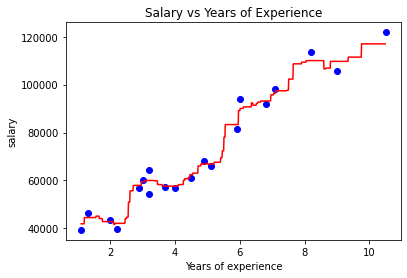

In [76]:
x_grid=np.arange(min(x),max(x),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_grid,RF.predict(x_grid),color='red')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.show()